In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("../data/calories.xlsx")

In [3]:
df

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [4]:
df.head(10)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ
9,CannedFruit,Canned Fruit Salad,100g,50 cal,210 kJ


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [6]:
df["FoodItem"].unique()

array(['Applesauce', 'Canned Apricots', 'Canned Blackberries', ...,
       'Tapenade', 'Vegemite', 'Wild Honey'], shape=(1993,), dtype=object)

In [7]:
df["FoodItem"].value_counts()

FoodItem
Horseradish                4
Chicken Breast             4
Roast Beef                 4
Tamarind                   3
Okra                       3
                          ..
Canned Mandarin Oranges    1
Canned Grapes              1
Canned Grapefruit          1
Canned Gooseberries        1
Canned Fruit Salad         1
Name: count, Length: 1993, dtype: int64

In [8]:
df[df["FoodItem"]=="Okra"]

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
203,Vegetables,Okra,100g,33 cal,139 kJ
1675,Legumes,Okra,100g,33 cal,139 kJ
2021,Herbs&Spices,Okra,100g,33 cal,139 kJ


Data cleaning

In [9]:
# df = df.rename(dict(Cals_per100grams= "Calories", per100grams="per100", KJ_per100grams="kJ", axis="columns"))

df = df.rename(columns={"Cals_per100grams": "Calories", "per100grams": "per100", "KJ_per100grams": "kJ"})


df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [10]:
# contver to int
df["Calories"] = df["Calories"].str[:-3].astype(int)

In [11]:
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [12]:
df["per100"].value_counts()

per100
100g     1802
100ml     423
Name: count, dtype: int64

In [13]:
liquids =df[df["per100"] == "100ml"]
print(liquids.head())
liquids.info()

           FoodCategory       FoodItem per100  Calories      kJ
409  Milk&DairyProducts    Almond Milk  100ml        17   71 kJ
410  Milk&DairyProducts     Buttermilk  100ml        62  260 kJ
412  Milk&DairyProducts   Coconut Milk  100ml       230  966 kJ
422  Milk&DairyProducts  Hot Chocolate  100ml        89  374 kJ
423  Milk&DairyProducts          Kefir  100ml        55  231 kJ
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 409 to 2185
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FoodCategory  423 non-null    object
 1   FoodItem      423 non-null    object
 2   per100        423 non-null    object
 3   Calories      423 non-null    int64 
 4   kJ            423 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.8+ KB


In [14]:
solids = df[df["per100"]=="100g"]
solids

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617,2591 kJ
2221,Spreads,Tapenade,100g,233,979 kJ
2222,Spreads,Unsalted Butter,100g,717,3011 kJ
2223,Spreads,Vegemite,100g,180,756 kJ


In [15]:
liquids_sorted = liquids.sort_values(by="Calories", ascending=False)
liquids_top5 = liquids_sorted.head()

In [16]:
liquids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1771,Oils&Fats,Sardine Oil,100ml,902,3788 kJ


In [17]:
solids_sorted = solids.sort_values(by="Calories", ascending=False)
solids_top5 = solids_sorted.head()
solids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
675,Pork,Lard,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


Graphing

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

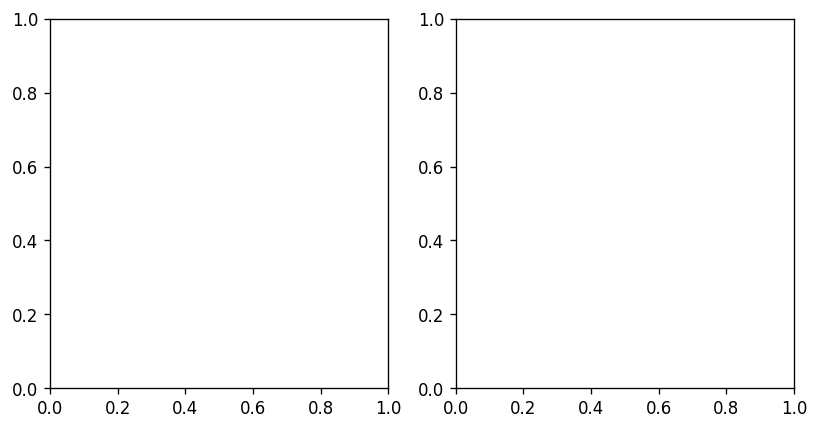

In [19]:
fig, axes = plt.subplots(1,2, dpi=120, figsize=(8,4))

<Axes: xlabel='FoodItem', ylabel='Calories'>

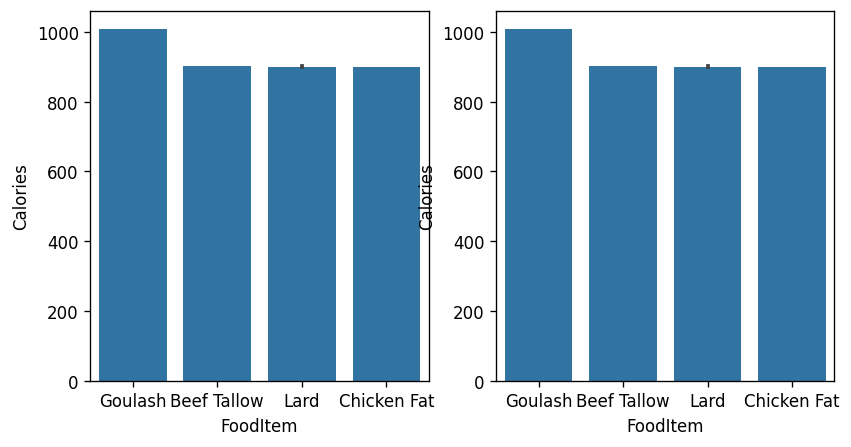

In [21]:
fig, axes = plt.subplots(1,2, dpi=120, figsize=(8,4))

sns.barplot(data=solids_top5, x="FoodItem", y="Calories", ax=axes[0])
sns.barplot(data=solids_top5, x="FoodItem", y="Calories", ax=axes[1])